In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Step 2: Load and Prepare the Titanic Dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)

In [3]:
# Fill missing values
imputer = SimpleImputer(strategy='most_frequent')
df[['Age', 'Embarked']] = imputer.fit_transform(df[['Age', 'Embarked']])

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [5]:
# Split into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [6]:
# Train/test split and feature scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Step 3: Train Traditional ML Models
models_dict = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}


In [8]:
# Train and evaluate each model
for name, model in models_dict.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

# Step 4: Plot ROC Curves
plt.figure(figsize=(8, 6))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

AUC: 0.8831402831402833

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

AUC: 0.8962033462033462

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    acc

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [9]:
def plot_roc_curve(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=label)

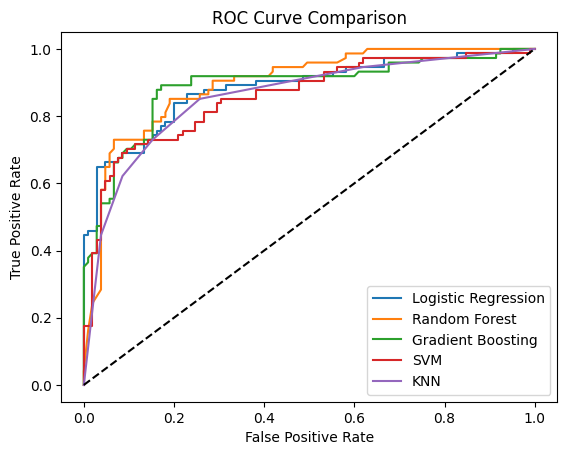

In [10]:

for name, model in models_dict.items():
    plot_roc_curve(model, X_test_scaled, y_test, name)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [11]:
# Step 5: Deep Neural Network (DNN) using TensorFlow
dnn_model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


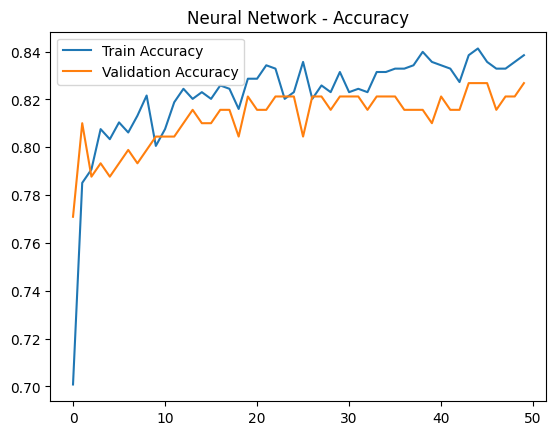

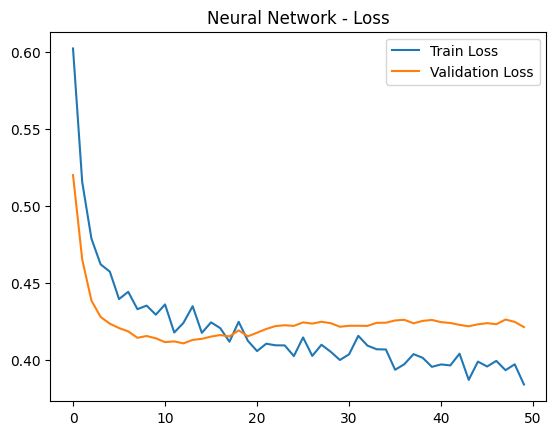

In [12]:
# Step 6: Plot DNN Training Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Neural Network - Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Neural Network - Loss")
plt.show()


In [13]:
# Step 7: Final Accuracy and AUC Comparison
results = {}

for name, model in models_dict.items():
    acc = model.score(X_test_scaled, y_test)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    results[name] = [acc, auc]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


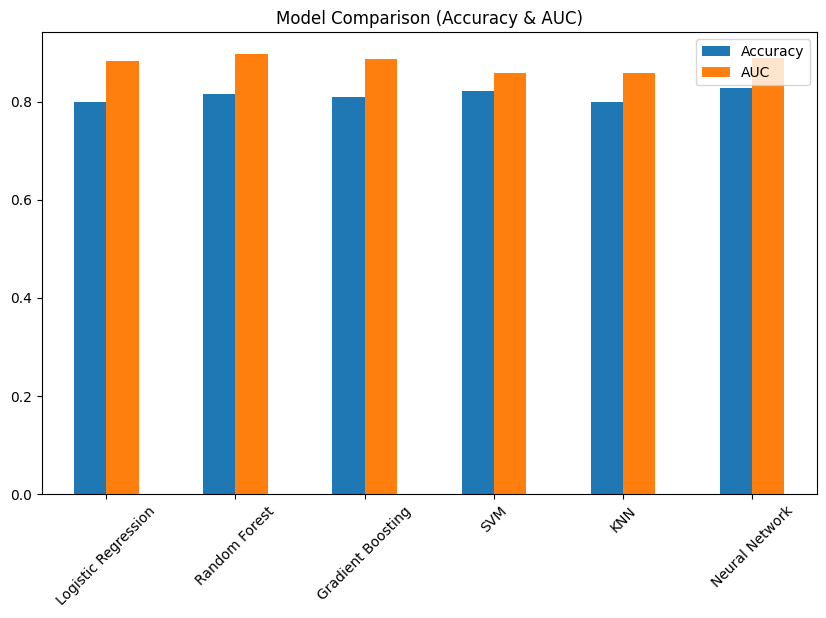

In [14]:
# Evaluate the Neural Network
nn_accuracy = dnn_model.evaluate(X_test_scaled, y_test, verbose=0)[1]
nn_auc = roc_auc_score(y_test, dnn_model.predict(X_test_scaled))
results['Neural Network'] = [nn_accuracy, nn_auc]

# Create DataFrame and plot bar chart
results_df = pd.DataFrame(results, index=["Accuracy", "AUC"]).T
results_df.plot(kind='bar', figsize=(10, 6), title="Model Comparison (Accuracy & AUC)")
plt.xticks(rotation=45)
plt.show()